Most Demanded skills for Job roles?

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) & pd.notna(skills) else skills)



In [31]:
country='India'
df_country_job=df[(df['job_country']==country)]
df_skills=df_country_job.explode('job_skills')
df_skills[['job_title','job_skills']]
df_grouped=df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
job_titles=df_skills['job_title_short'].unique().tolist()[:5]
job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Senior Data Engineer',
 'Software Engineer']

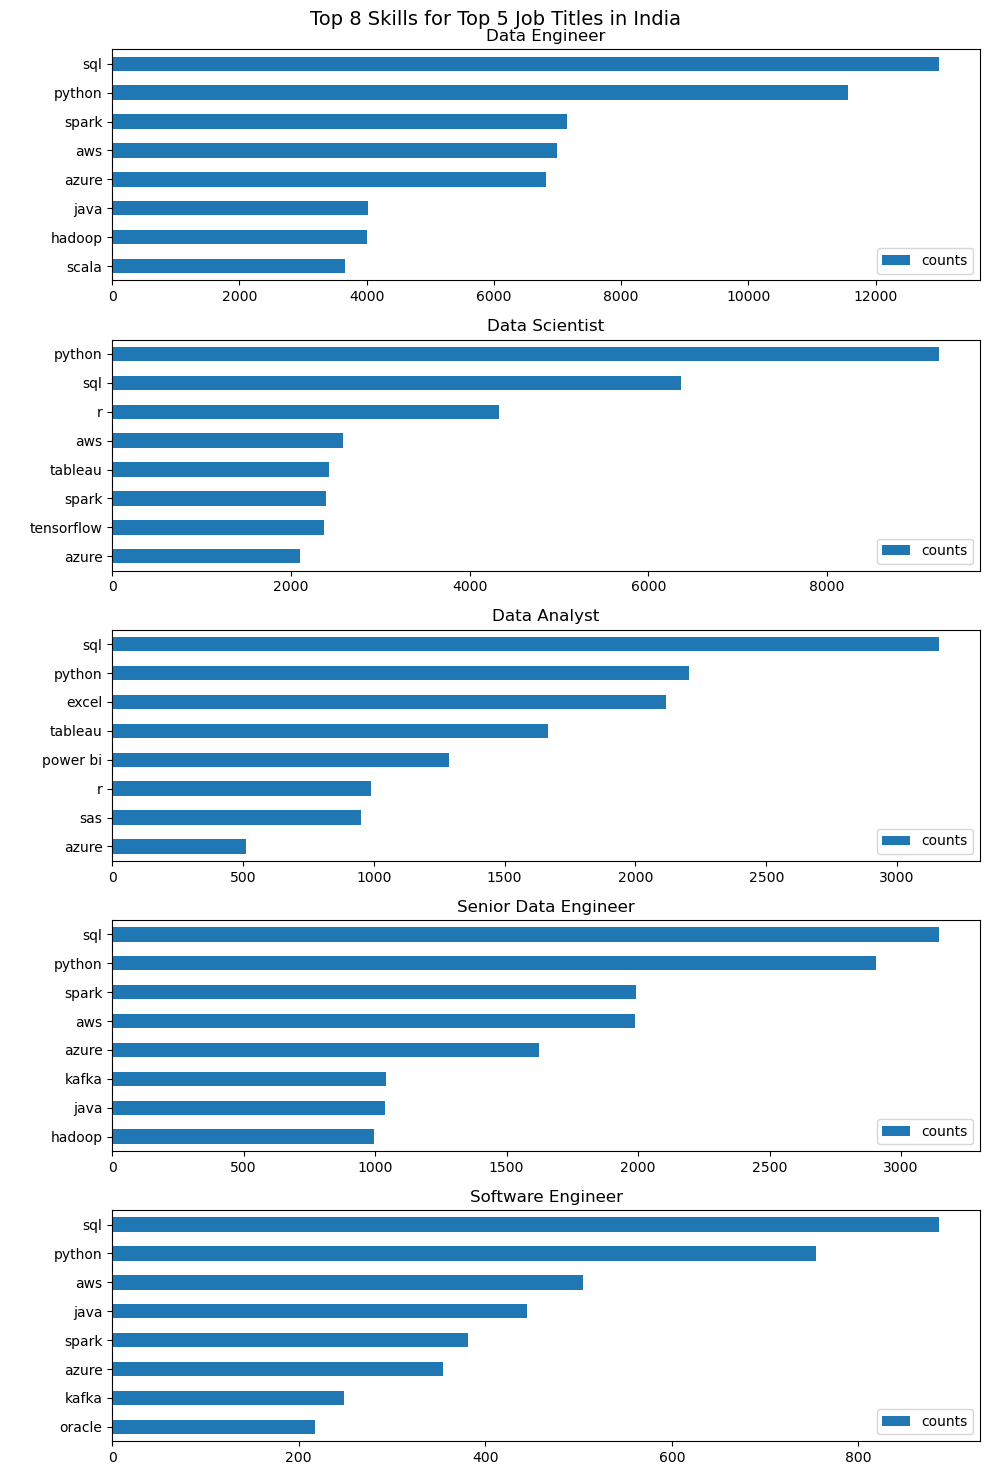

In [37]:
fig, ax = plt.subplots(len(job_titles),1, figsize=(10, 15))
for i,job_title in enumerate(job_titles):
    df_plot=df_grouped[df_grouped['job_title_short']==job_title].head(8)
    df_plot[::-1].plot(kind='barh',x='job_skills',y='counts',ax=ax[i],title=job_title)
    ax[i].set_ylabel(' ')

plt.suptitle(f'Top 8 Skills for Top 5 Job Titles in {country}', fontsize=14)
plt.tight_layout()
plt.show()